# Setting up GPU-Enabled

In [1]:
# Setting GPU-enabled Tensorflow
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
  except RuntimeError as e:
    print(e)

# Import Packages

In [2]:
import os
import re
import numpy as np
import tensorflow as tf
import pandas as pd
from matplotlib import pyplot as plt


from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import DenseNet169

from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.applications.densenet import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img

from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report

In [3]:
# Check available GPU devices.
print("The following GPU devices are available: %s" % tf.config.experimental.list_physical_devices("GPU"))
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

The following GPU devices are available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Num GPUs Available:  1


In [4]:
dataset =os.path.join(os.getcwd(),r"Dataset")

# Load Dataset

In [5]:
images  = []
labels = []
i=0

for dfolder in os.listdir(dataset):
    dfolder = os.path.join(dataset,dfolder)
    for image_file in os.listdir(dfolder):
        img_path = os.path.join(dfolder, image_file)
        img_label = re.findall(r'\b(\w+-)\b',image_file)[0][:-1]
        print(img_path, img_label)
        
        image = load_img(img_path, target_size=(224, 224))
        image = img_to_array(image)
        image = preprocess_input(image)

        images.append(image)
        labels.append(img_label)


C:\Users\User\Code\WID3008 Image Processing\Dataset\COVID\COVID-1.png COVID
C:\Users\User\Code\WID3008 Image Processing\Dataset\COVID\COVID-10.png COVID
C:\Users\User\Code\WID3008 Image Processing\Dataset\COVID\COVID-100.png COVID
C:\Users\User\Code\WID3008 Image Processing\Dataset\COVID\COVID-101.png COVID
C:\Users\User\Code\WID3008 Image Processing\Dataset\COVID\COVID-102.png COVID
C:\Users\User\Code\WID3008 Image Processing\Dataset\COVID\COVID-103.png COVID
C:\Users\User\Code\WID3008 Image Processing\Dataset\COVID\COVID-104.png COVID
C:\Users\User\Code\WID3008 Image Processing\Dataset\COVID\COVID-105.png COVID
C:\Users\User\Code\WID3008 Image Processing\Dataset\COVID\COVID-106.png COVID
C:\Users\User\Code\WID3008 Image Processing\Dataset\COVID\COVID-107.png COVID
C:\Users\User\Code\WID3008 Image Processing\Dataset\COVID\COVID-108.png COVID
C:\Users\User\Code\WID3008 Image Processing\Dataset\COVID\COVID-109.png COVID
C:\Users\User\Code\WID3008 Image Processing\Dataset\COVID\COVID-11.

C:\Users\User\Code\WID3008 Image Processing\Dataset\COVID\COVID-221.png COVID
C:\Users\User\Code\WID3008 Image Processing\Dataset\COVID\COVID-222.png COVID
C:\Users\User\Code\WID3008 Image Processing\Dataset\COVID\COVID-223.png COVID
C:\Users\User\Code\WID3008 Image Processing\Dataset\COVID\COVID-224.png COVID
C:\Users\User\Code\WID3008 Image Processing\Dataset\COVID\COVID-225.png COVID
C:\Users\User\Code\WID3008 Image Processing\Dataset\COVID\COVID-226.png COVID
C:\Users\User\Code\WID3008 Image Processing\Dataset\COVID\COVID-227.png COVID
C:\Users\User\Code\WID3008 Image Processing\Dataset\COVID\COVID-228.png COVID
C:\Users\User\Code\WID3008 Image Processing\Dataset\COVID\COVID-229.png COVID
C:\Users\User\Code\WID3008 Image Processing\Dataset\COVID\COVID-23.png COVID
C:\Users\User\Code\WID3008 Image Processing\Dataset\COVID\COVID-230.png COVID
C:\Users\User\Code\WID3008 Image Processing\Dataset\COVID\COVID-231.png COVID
C:\Users\User\Code\WID3008 Image Processing\Dataset\COVID\COVID-2

C:\Users\User\Code\WID3008 Image Processing\Dataset\COVID\COVID-339.png COVID
C:\Users\User\Code\WID3008 Image Processing\Dataset\COVID\COVID-34.png COVID
C:\Users\User\Code\WID3008 Image Processing\Dataset\COVID\COVID-340.png COVID
C:\Users\User\Code\WID3008 Image Processing\Dataset\COVID\COVID-341.png COVID
C:\Users\User\Code\WID3008 Image Processing\Dataset\COVID\COVID-342.png COVID
C:\Users\User\Code\WID3008 Image Processing\Dataset\COVID\COVID-343.png COVID
C:\Users\User\Code\WID3008 Image Processing\Dataset\COVID\COVID-344.png COVID
C:\Users\User\Code\WID3008 Image Processing\Dataset\COVID\COVID-345.png COVID
C:\Users\User\Code\WID3008 Image Processing\Dataset\COVID\COVID-346.png COVID
C:\Users\User\Code\WID3008 Image Processing\Dataset\COVID\COVID-347.png COVID
C:\Users\User\Code\WID3008 Image Processing\Dataset\COVID\COVID-348.png COVID
C:\Users\User\Code\WID3008 Image Processing\Dataset\COVID\COVID-349.png COVID
C:\Users\User\Code\WID3008 Image Processing\Dataset\COVID\COVID-3

C:\Users\User\Code\WID3008 Image Processing\Dataset\COVID\COVID-441.png COVID
C:\Users\User\Code\WID3008 Image Processing\Dataset\COVID\COVID-442.png COVID
C:\Users\User\Code\WID3008 Image Processing\Dataset\COVID\COVID-443.png COVID
C:\Users\User\Code\WID3008 Image Processing\Dataset\COVID\COVID-444.png COVID
C:\Users\User\Code\WID3008 Image Processing\Dataset\COVID\COVID-445.png COVID
C:\Users\User\Code\WID3008 Image Processing\Dataset\COVID\COVID-446.png COVID
C:\Users\User\Code\WID3008 Image Processing\Dataset\COVID\COVID-447.png COVID
C:\Users\User\Code\WID3008 Image Processing\Dataset\COVID\COVID-448.png COVID
C:\Users\User\Code\WID3008 Image Processing\Dataset\COVID\COVID-449.png COVID
C:\Users\User\Code\WID3008 Image Processing\Dataset\COVID\COVID-45.png COVID
C:\Users\User\Code\WID3008 Image Processing\Dataset\COVID\COVID-450.png COVID
C:\Users\User\Code\WID3008 Image Processing\Dataset\COVID\COVID-451.png COVID
C:\Users\User\Code\WID3008 Image Processing\Dataset\COVID\COVID-4

C:\Users\User\Code\WID3008 Image Processing\Dataset\Lung Opacity\Lung_Opacity-107.png Lung_Opacity
C:\Users\User\Code\WID3008 Image Processing\Dataset\Lung Opacity\Lung_Opacity-108.png Lung_Opacity
C:\Users\User\Code\WID3008 Image Processing\Dataset\Lung Opacity\Lung_Opacity-109.png Lung_Opacity
C:\Users\User\Code\WID3008 Image Processing\Dataset\Lung Opacity\Lung_Opacity-11.png Lung_Opacity
C:\Users\User\Code\WID3008 Image Processing\Dataset\Lung Opacity\Lung_Opacity-110.png Lung_Opacity
C:\Users\User\Code\WID3008 Image Processing\Dataset\Lung Opacity\Lung_Opacity-111.png Lung_Opacity
C:\Users\User\Code\WID3008 Image Processing\Dataset\Lung Opacity\Lung_Opacity-112.png Lung_Opacity
C:\Users\User\Code\WID3008 Image Processing\Dataset\Lung Opacity\Lung_Opacity-113.png Lung_Opacity
C:\Users\User\Code\WID3008 Image Processing\Dataset\Lung Opacity\Lung_Opacity-114.png Lung_Opacity
C:\Users\User\Code\WID3008 Image Processing\Dataset\Lung Opacity\Lung_Opacity-115.png Lung_Opacity
C:\Users\Us

C:\Users\User\Code\WID3008 Image Processing\Dataset\Lung Opacity\Lung_Opacity-218.png Lung_Opacity
C:\Users\User\Code\WID3008 Image Processing\Dataset\Lung Opacity\Lung_Opacity-219.png Lung_Opacity
C:\Users\User\Code\WID3008 Image Processing\Dataset\Lung Opacity\Lung_Opacity-22.png Lung_Opacity
C:\Users\User\Code\WID3008 Image Processing\Dataset\Lung Opacity\Lung_Opacity-220.png Lung_Opacity
C:\Users\User\Code\WID3008 Image Processing\Dataset\Lung Opacity\Lung_Opacity-221.png Lung_Opacity
C:\Users\User\Code\WID3008 Image Processing\Dataset\Lung Opacity\Lung_Opacity-222.png Lung_Opacity
C:\Users\User\Code\WID3008 Image Processing\Dataset\Lung Opacity\Lung_Opacity-223.png Lung_Opacity
C:\Users\User\Code\WID3008 Image Processing\Dataset\Lung Opacity\Lung_Opacity-224.png Lung_Opacity
C:\Users\User\Code\WID3008 Image Processing\Dataset\Lung Opacity\Lung_Opacity-225.png Lung_Opacity
C:\Users\User\Code\WID3008 Image Processing\Dataset\Lung Opacity\Lung_Opacity-226.png Lung_Opacity
C:\Users\Us

C:\Users\User\Code\WID3008 Image Processing\Dataset\Lung Opacity\Lung_Opacity-295.png Lung_Opacity
C:\Users\User\Code\WID3008 Image Processing\Dataset\Lung Opacity\Lung_Opacity-296.png Lung_Opacity
C:\Users\User\Code\WID3008 Image Processing\Dataset\Lung Opacity\Lung_Opacity-297.png Lung_Opacity
C:\Users\User\Code\WID3008 Image Processing\Dataset\Lung Opacity\Lung_Opacity-298.png Lung_Opacity
C:\Users\User\Code\WID3008 Image Processing\Dataset\Lung Opacity\Lung_Opacity-299.png Lung_Opacity
C:\Users\User\Code\WID3008 Image Processing\Dataset\Lung Opacity\Lung_Opacity-3.png Lung_Opacity
C:\Users\User\Code\WID3008 Image Processing\Dataset\Lung Opacity\Lung_Opacity-30.png Lung_Opacity
C:\Users\User\Code\WID3008 Image Processing\Dataset\Lung Opacity\Lung_Opacity-300.png Lung_Opacity
C:\Users\User\Code\WID3008 Image Processing\Dataset\Lung Opacity\Lung_Opacity-301.png Lung_Opacity
C:\Users\User\Code\WID3008 Image Processing\Dataset\Lung Opacity\Lung_Opacity-302.png Lung_Opacity
C:\Users\User

C:\Users\User\Code\WID3008 Image Processing\Dataset\Lung Opacity\Lung_Opacity-446.png Lung_Opacity
C:\Users\User\Code\WID3008 Image Processing\Dataset\Lung Opacity\Lung_Opacity-447.png Lung_Opacity
C:\Users\User\Code\WID3008 Image Processing\Dataset\Lung Opacity\Lung_Opacity-448.png Lung_Opacity
C:\Users\User\Code\WID3008 Image Processing\Dataset\Lung Opacity\Lung_Opacity-449.png Lung_Opacity
C:\Users\User\Code\WID3008 Image Processing\Dataset\Lung Opacity\Lung_Opacity-45.png Lung_Opacity
C:\Users\User\Code\WID3008 Image Processing\Dataset\Lung Opacity\Lung_Opacity-450.png Lung_Opacity
C:\Users\User\Code\WID3008 Image Processing\Dataset\Lung Opacity\Lung_Opacity-451.png Lung_Opacity
C:\Users\User\Code\WID3008 Image Processing\Dataset\Lung Opacity\Lung_Opacity-452.png Lung_Opacity
C:\Users\User\Code\WID3008 Image Processing\Dataset\Lung Opacity\Lung_Opacity-453.png Lung_Opacity
C:\Users\User\Code\WID3008 Image Processing\Dataset\Lung Opacity\Lung_Opacity-454.png Lung_Opacity
C:\Users\Us

C:\Users\User\Code\WID3008 Image Processing\Dataset\Lung Opacity\Lung_Opacity-77.png Lung_Opacity
C:\Users\User\Code\WID3008 Image Processing\Dataset\Lung Opacity\Lung_Opacity-78.png Lung_Opacity
C:\Users\User\Code\WID3008 Image Processing\Dataset\Lung Opacity\Lung_Opacity-79.png Lung_Opacity
C:\Users\User\Code\WID3008 Image Processing\Dataset\Lung Opacity\Lung_Opacity-8.png Lung_Opacity
C:\Users\User\Code\WID3008 Image Processing\Dataset\Lung Opacity\Lung_Opacity-80.png Lung_Opacity
C:\Users\User\Code\WID3008 Image Processing\Dataset\Lung Opacity\Lung_Opacity-81.png Lung_Opacity
C:\Users\User\Code\WID3008 Image Processing\Dataset\Lung Opacity\Lung_Opacity-82.png Lung_Opacity
C:\Users\User\Code\WID3008 Image Processing\Dataset\Lung Opacity\Lung_Opacity-83.png Lung_Opacity
C:\Users\User\Code\WID3008 Image Processing\Dataset\Lung Opacity\Lung_Opacity-84.png Lung_Opacity
C:\Users\User\Code\WID3008 Image Processing\Dataset\Lung Opacity\Lung_Opacity-85.png Lung_Opacity
C:\Users\User\Code\WI

C:\Users\User\Code\WID3008 Image Processing\Dataset\Normal\Normal-186.png Normal
C:\Users\User\Code\WID3008 Image Processing\Dataset\Normal\Normal-187.png Normal
C:\Users\User\Code\WID3008 Image Processing\Dataset\Normal\Normal-188.png Normal
C:\Users\User\Code\WID3008 Image Processing\Dataset\Normal\Normal-189.png Normal
C:\Users\User\Code\WID3008 Image Processing\Dataset\Normal\Normal-19.png Normal
C:\Users\User\Code\WID3008 Image Processing\Dataset\Normal\Normal-190.png Normal
C:\Users\User\Code\WID3008 Image Processing\Dataset\Normal\Normal-191.png Normal
C:\Users\User\Code\WID3008 Image Processing\Dataset\Normal\Normal-192.png Normal
C:\Users\User\Code\WID3008 Image Processing\Dataset\Normal\Normal-193.png Normal
C:\Users\User\Code\WID3008 Image Processing\Dataset\Normal\Normal-194.png Normal
C:\Users\User\Code\WID3008 Image Processing\Dataset\Normal\Normal-195.png Normal
C:\Users\User\Code\WID3008 Image Processing\Dataset\Normal\Normal-196.png Normal
C:\Users\User\Code\WID3008 Im

C:\Users\User\Code\WID3008 Image Processing\Dataset\Normal\Normal-307.png Normal
C:\Users\User\Code\WID3008 Image Processing\Dataset\Normal\Normal-308.png Normal
C:\Users\User\Code\WID3008 Image Processing\Dataset\Normal\Normal-309.png Normal
C:\Users\User\Code\WID3008 Image Processing\Dataset\Normal\Normal-31.png Normal
C:\Users\User\Code\WID3008 Image Processing\Dataset\Normal\Normal-310.png Normal
C:\Users\User\Code\WID3008 Image Processing\Dataset\Normal\Normal-311.png Normal
C:\Users\User\Code\WID3008 Image Processing\Dataset\Normal\Normal-312.png Normal
C:\Users\User\Code\WID3008 Image Processing\Dataset\Normal\Normal-313.png Normal
C:\Users\User\Code\WID3008 Image Processing\Dataset\Normal\Normal-314.png Normal
C:\Users\User\Code\WID3008 Image Processing\Dataset\Normal\Normal-315.png Normal
C:\Users\User\Code\WID3008 Image Processing\Dataset\Normal\Normal-316.png Normal
C:\Users\User\Code\WID3008 Image Processing\Dataset\Normal\Normal-317.png Normal
C:\Users\User\Code\WID3008 Im

C:\Users\User\Code\WID3008 Image Processing\Dataset\Normal\Normal-415.png Normal
C:\Users\User\Code\WID3008 Image Processing\Dataset\Normal\Normal-416.png Normal
C:\Users\User\Code\WID3008 Image Processing\Dataset\Normal\Normal-417.png Normal
C:\Users\User\Code\WID3008 Image Processing\Dataset\Normal\Normal-418.png Normal
C:\Users\User\Code\WID3008 Image Processing\Dataset\Normal\Normal-419.png Normal
C:\Users\User\Code\WID3008 Image Processing\Dataset\Normal\Normal-42.png Normal
C:\Users\User\Code\WID3008 Image Processing\Dataset\Normal\Normal-420.png Normal
C:\Users\User\Code\WID3008 Image Processing\Dataset\Normal\Normal-421.png Normal
C:\Users\User\Code\WID3008 Image Processing\Dataset\Normal\Normal-422.png Normal
C:\Users\User\Code\WID3008 Image Processing\Dataset\Normal\Normal-423.png Normal
C:\Users\User\Code\WID3008 Image Processing\Dataset\Normal\Normal-424.png Normal
C:\Users\User\Code\WID3008 Image Processing\Dataset\Normal\Normal-425.png Normal
C:\Users\User\Code\WID3008 Im

C:\Users\User\Code\WID3008 Image Processing\Dataset\Normal\Normal-67.png Normal
C:\Users\User\Code\WID3008 Image Processing\Dataset\Normal\Normal-68.png Normal
C:\Users\User\Code\WID3008 Image Processing\Dataset\Normal\Normal-69.png Normal
C:\Users\User\Code\WID3008 Image Processing\Dataset\Normal\Normal-7.png Normal
C:\Users\User\Code\WID3008 Image Processing\Dataset\Normal\Normal-70.png Normal
C:\Users\User\Code\WID3008 Image Processing\Dataset\Normal\Normal-71.png Normal
C:\Users\User\Code\WID3008 Image Processing\Dataset\Normal\Normal-72.png Normal
C:\Users\User\Code\WID3008 Image Processing\Dataset\Normal\Normal-73.png Normal
C:\Users\User\Code\WID3008 Image Processing\Dataset\Normal\Normal-74.png Normal
C:\Users\User\Code\WID3008 Image Processing\Dataset\Normal\Normal-75.png Normal
C:\Users\User\Code\WID3008 Image Processing\Dataset\Normal\Normal-76.png Normal
C:\Users\User\Code\WID3008 Image Processing\Dataset\Normal\Normal-77.png Normal
C:\Users\User\Code\WID3008 Image Processi

In [6]:
# convert the data and labels to NumPy arrays
data = np.array(images, dtype="float32")
labels = pd.get_dummies(labels).to_numpy()

# Train Test Split

In [7]:
# using sklearn.preprocessing splitting the dataset into training dataset and testing dataset
(trainX, testX, trainY, testY) = train_test_split(data, labels,test_size=0.30, stratify=labels, random_state=10)

In [8]:
# define an data augmentation object to perform data augmentation while feeding forward into the Face Mask Detector model
aug = ImageDataGenerator(rotation_range=20,zoom_range=0.15,width_shift_range=0.2,
                         height_shift_range=0.2,shear_range=0.15,horizontal_flip=True,fill_mode="nearest")

In [9]:
# load the DensetNet169 network, ensuring the head FC layer sets are left off
baseModel = DenseNet169(weights="imagenet", include_top=False, input_tensor=Input(shape=(224, 224, 3)))

51879936/51877672 [==============================] - 12s 0us/step


In [10]:
baseModel.summary()

Model: "densenet169"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 112, 112, 64) 9408        zero_padding2d[0][0]             
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1/conv[0][0]                 
________________________________________________________________________________________

conv5_block10_concat (Concatena (None, 7, 7, 960)    0           conv5_block9_concat[0][0]        
                                                                 conv5_block10_2_conv[0][0]       
__________________________________________________________________________________________________
conv5_block11_0_bn (BatchNormal (None, 7, 7, 960)    3840        conv5_block10_concat[0][0]       
__________________________________________________________________________________________________
conv5_block11_0_relu (Activatio (None, 7, 7, 960)    0           conv5_block11_0_bn[0][0]         
__________________________________________________________________________________________________
conv5_block11_1_conv (Conv2D)   (None, 7, 7, 128)    122880      conv5_block11_0_relu[0][0]       
__________________________________________________________________________________________________
conv5_block11_1_bn (BatchNormal (None, 7, 7, 128)    512         conv5_block11_1_conv[0][0]       
__________

conv5_block29_0_bn (BatchNormal (None, 7, 7, 1536)   6144        conv5_block28_concat[0][0]       
__________________________________________________________________________________________________
conv5_block29_0_relu (Activatio (None, 7, 7, 1536)   0           conv5_block29_0_bn[0][0]         
__________________________________________________________________________________________________
conv5_block29_1_conv (Conv2D)   (None, 7, 7, 128)    196608      conv5_block29_0_relu[0][0]       
__________________________________________________________________________________________________
conv5_block29_1_bn (BatchNormal (None, 7, 7, 128)    512         conv5_block29_1_conv[0][0]       
__________________________________________________________________________________________________
conv5_block29_1_relu (Activatio (None, 7, 7, 128)    0           conv5_block29_1_bn[0][0]         
__________________________________________________________________________________________________
conv5_bloc

In [11]:
# construct the head of the model that will be placed on top of the
# the base model
# Softmax is used for multiclass classification problem.
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(7, 7))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(128, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(3, activation="softmax")(headModel)

In [12]:
model = Model(inputs=baseModel.input, outputs=headModel)

In [13]:
# Due to the baseModel is DenseNet169 and the weights are trained,
# so we do not need to train the parameters of the layers again, 
# therefore we only train our fully connected layers' parameters
for layer in baseModel.layers:
    layer.trainable = False

In [14]:
# We can see that the number of trainable params is 213,507 where these are 
# are the parameters from headModel, while non-trainable params are consists of 
# feature extractor of the DenseNet169
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 112, 112, 64) 9408        zero_padding2d[0][0]             
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1/conv[0][0]                 
______________________________________________________________________________________________

Total params: 12,856,387
Trainable params: 213,507
Non-trainable params: 12,642,880
__________________________________________________________________________________________________


# Train Model

In [15]:
# defining the learning rate, epochs and the batch size for training the model
learning_rate = 0.001
epochs = 20
bs = 64

optimizer = Adam(lr= learning_rate, decay=learning_rate/epochs)

model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=['accuracy'])

hist = model.fit(
    aug.flow(trainX,trainY, batch_size = bs),
    steps_per_epoch = len(trainX)//bs,
    validation_data = (testX, testY),
    validation_steps = len(testX)//bs,
    epochs = epochs
)

model.save(os.getcwd()+r"\desnet169_chest_xray_classification_model")

c:\users\user\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/20
16/16 [==============================] - 125s 6s/step - loss: 0.8374 - accuracy: 0.6279 - val_loss: 0.4773 - val_accuracy: 0.8022
Epoch 2/20
16/16 [==============================] - 71s 4s/step - loss: 0.5187 - accuracy: 0.7911 - val_loss: 0.4601 - val_accuracy: 0.7911
Epoch 3/20
16/16 [==============================] - 61s 4s/step - loss: 0.4597 - accuracy: 0.8063 - val_loss: 0.4041 - val_accuracy: 0.8378
Epoch 4/20
16/16 [==============================] - 62s 4s/step - loss: 0.4129 - accuracy: 0.8357 - val_loss: 0.3796 - val_accuracy: 0.8489
Epoch 5/20
16/16 [==============================] - 61s 4s/step - loss: 0.4078 - accuracy: 0.8418 - val_loss: 0.4454 - val_accuracy: 0.7933
Epoch 6/20
16/16 [==============================] - 63s 4s/step - loss: 0.4281 - accuracy: 0.8281 - val_loss: 0.3727 - val_accuracy: 0.8533
Epoch 7/20
16/16 [==============================] - 63s 4s/step - loss: 0.3748 - accuracy: 0.8457 - val_loss: 0.3413 - val_accuracy: 0.8533
Epoch 8/20
16/16 [=

# Evaluate Model

In [16]:
predict = model.predict(testX, batch_size = bs)

In [17]:
predict = np.argmax(predict,axis=1)
print(classification_report(testY.argmax(axis=1), predict, target_names=['COVID','Lung Opacity','Normal']))

              precision    recall  f1-score   support

       COVID       0.94      0.77      0.85       150
Lung Opacity       0.81      0.93      0.86       150
      Normal       0.92      0.95      0.93       150

    accuracy                           0.88       450
   macro avg       0.89      0.88      0.88       450
weighted avg       0.89      0.88      0.88       450



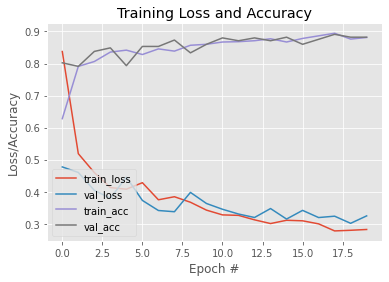

In [18]:
# plot the training loss and accuracy graphs of training and validation 
N = epochs
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), hist.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), hist.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), hist.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), hist.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
